# Detecting Missing Values

## Import de bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
tit = pd.read_csv('../Course_Materials_Part2/Video_Lecture_NBs/titanic.csv')

In [5]:
tit.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [6]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [7]:
tit.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,True
887,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,True
889,False,False,False,False,False,False,False,False,False


In [10]:
tit.isna().sum(axis=0)

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [11]:
tit.isna().any(axis=0)

survived    False
pclass      False
sex         False
age          True
sibsp       False
parch       False
fare        False
embarked     True
deck         True
dtype: bool

In [12]:
tit[tit.isna().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
2,1,3,female,26.0,0,0,7.9250,S,NaN
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,NaN,0,0,8.4583,Q,NaN
7,0,3,male,2.0,3,1,21.0750,S,NaN
...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,NaN
885,0,3,female,39.0,0,5,29.1250,Q,NaN
886,0,2,male,27.0,0,0,13.0000,S,NaN
888,0,3,female,NaN,1,2,23.4500,S,NaN


In [13]:
tit.notna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,False
887,True,True,True,True,True,True,True,True,True
888,True,True,True,False,True,True,True,True,False
889,True,True,True,True,True,True,True,True,True


In [16]:
tit.notna().sum(axis=0)

survived    891
pclass      891
sex         891
age         714
sibsp       891
parch       891
fare        891
embarked    889
deck        203
dtype: int64

In [17]:
tit.notna().all(axis=0)

survived     True
pclass       True
sex          True
age         False
sibsp        True
parch        True
fare         True
embarked    False
deck        False
dtype: bool

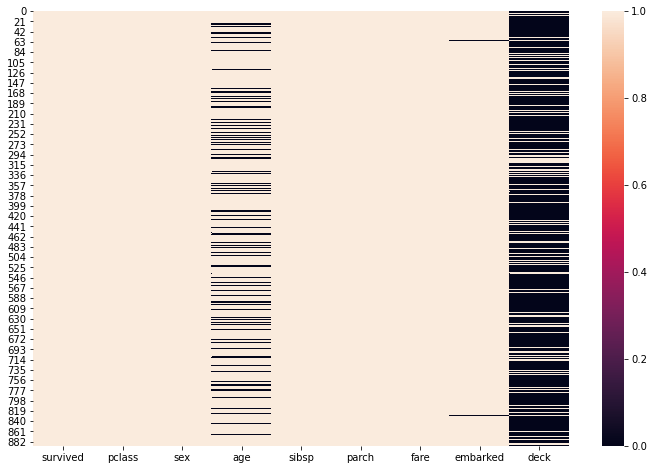

In [30]:
plt.figure(figsize = (12,8))
sns.heatmap(tit.notna())
plt.show()

In [31]:
tit.age.value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
0.42       1
34.50      1
66.00      1
14.50      1
0.92       1
Name: age, Length: 89, dtype: int64

In [32]:
tit.age.replace(to_replace="Missing Data", value = np.nan, inplace = True)

In [33]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [34]:
tit.age = tit.age.astype("float")

In [35]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
